# Setup

Clone GitHub [repository](https://github.com/ultralytics/yolov5), install [dependencies](https://github.com/ultralytics/yolov5/blob/master/requirements.txt) and check PyTorch and GPU.

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-196-gacdf73b Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.2/78.2 GB disk)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip -q /content/train_data.zip -d/content/

# 1. Detect

`detect.py` runs YOLOv5 inference on a variety of sources, downloading models automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases), and saving results to `runs/detect`. Example inference sources are:

```shell
python detect.py --source 0  # webcam
                          img.jpg  # image
                          vid.mp4  # video
                          screen  # screenshot
                          path/  # directory
                         'path/*.jpg'  # glob
                         'https://youtu.be/Zgi9g1ksQHc'  # YouTube
                         'rtsp://example.com/media.mp4'  # RTSP, RTMP, HTTP stream
```

##Detections without Labels

In [ ]:
import torch

# Model
#model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # or yolov5m, yolov5l, yolov5x, etc.
model = torch.hub.load('ultralytics/yolov5', 'custom', '/content/drive/MyDrive/helabest.pt')
# model = torch.hub.load('ultralytics/yolov5', 'custom', '/content/drive/MyDrive/dicweights/DIC.pt')

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 v7.0-185-g2334aa7 Python-3.10.12 torch-2.0.1+cu118 CPU

Fusing layers... 
Model summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
Adding AutoShape... 


In [ ]:
!unzip -q /content/_hela.zip -d/content/

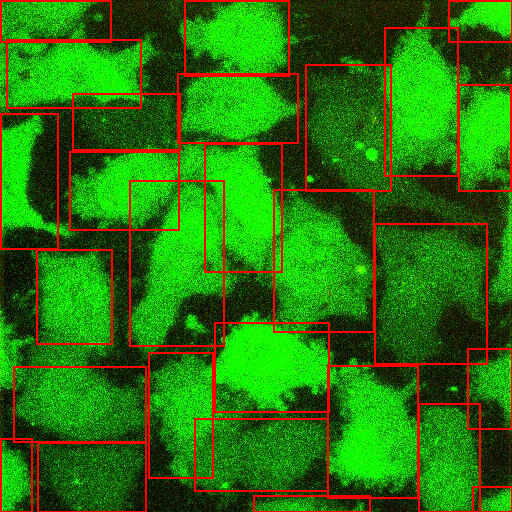

In [ ]:
import torch
from PIL import Image, ImageDraw

# Load image
image = Image.open('/content/images/c3.png')

# Run inference
results = model(image)

# Extract bounding box coordinates
boxes = results.xyxy[0]

# Draw bounding boxes on image
draw = ImageDraw.Draw(image)
for box in boxes:
    # Get top-left and bottom-right coordinates
    x1, y1, x2, y2 = map(int, box[:4])
    # Draw rectangle
    draw.rectangle([(x1, y1), (x2, y2)], outline='red', width=2)

# Show image
image.show()



In [ ]:
print(boxes[:,0:4])

tensor([[273.78143, 189.05394, 374.46542, 332.11237],
        [177.44551,  73.45892, 298.64557, 143.41241],
        [204.94536, 143.35034, 282.12378, 272.03320],
        [384.11398,  27.12045, 458.25244, 176.51169],
        [305.45291,  64.64125, 391.94672, 191.14345],
        [ 69.54301, 151.87112, 179.79541, 230.50777],
        [214.90262, 322.73102, 329.42010, 412.02863],
        [327.28363, 365.53915, 418.50684, 498.05341],
        [129.25777, 180.40723, 224.69194, 346.98853],
        [ 36.91825, 249.48933, 112.79551, 344.63455],
        [458.41788,  84.95226, 511.75555, 191.52556],
        [  6.62415,  39.27901, 141.50571, 108.92460],
        [374.31339, 223.83318, 487.66202, 364.92572],
        [184.68701,   0.00000, 289.82993,  76.50293],
        [ 13.78500, 366.89963, 146.57626, 442.52441],
        [ 37.47665, 442.02588, 146.20459, 512.00000],
        [194.92317, 418.94049, 328.90793, 491.52777],
        [418.53369, 403.35138, 480.71729, 512.00000],
        [148.10767, 352.9608

In [ ]:
box = boxes[:,0:4]
box = box.cpu().numpy()
box

array([[     273.78,      189.05,      374.47,      332.11],
       [     177.45,      73.459,      298.65,      143.41],
       [     204.95,      143.35,      282.12,      272.03],
       [     384.11,       27.12,      458.25,      176.51],
       [     305.45,      64.641,      391.95,      191.14],
       [     69.543,      151.87,       179.8,      230.51],
       [      214.9,      322.73,      329.42,      412.03],
       [     327.28,      365.54,      418.51,      498.05],
       [     129.26,      180.41,      224.69,      346.99],
       [     36.918,      249.49,       112.8,      344.63],
       [     458.42,      84.952,      511.76,      191.53],
       [     6.6241,      39.279,      141.51,      108.92],
       [     374.31,      223.83,      487.66,      364.93],
       [     184.69,           0,      289.83,      76.503],
       [     13.785,       366.9,      146.58,      442.52],
       [     37.477,      442.03,       146.2,         512],
       [     194.92,    

In [ ]:
from PIL import Image

# Open the image
image = Image.open("/content/images/c3.png")

# Define the list of regions to crop, where each region is a tuple of (left, upper, right, lower) coordinates
# crop_regions = [(100, 100, 300, 300), (400, 400, 600, 600), (700, 700, 900, 900)]

# Loop over the regions and crop each one
for i, crop_region in enumerate(box):
    # Crop the image
    cropped_image = image.crop(crop_region)

    # Save the cropped image with a unique filename for each crop
    cropped_image.save(f"/content/drive/MyDrive/dense cells/c3/{i}.png")


## Resizing the detections to 80X80

In [ ]:
import os
from PIL import Image

# Set the input and output folders
input_folder = "/content/drive/MyDrive/dense cells/c3"
output_folder = "/content/drive/MyDrive/dense cells/c38080"

# Create a dictionary to store original dimensions of each image
original_sizes = {}

# Loop through all files in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith(".png"):
        # Open the image file
        image_path = os.path.join(input_folder, filename)
        image = Image.open(image_path)

        # Store the original size of the image
        original_sizes[filename] = image.size

        # Resize the image to 80x80 pixels
        resized_image = image.resize((80, 80))

        # Save the resized image to the output folder
        output_path = os.path.join(output_folder, filename)
        resized_image.save(output_path)

## U-NET Prediction

In [ ]:
def dice_coef(y_true, y_pred):
  smooth = 0.0
  y_true_f = keras.flatten(y_true)
  y_pred_f = keras.flatten(y_pred)
  intersection = keras.sum(y_true_f * y_pred_f)
  return (2. * intersection + smooth) / (keras.sum(y_true_f) + keras.sum(y_pred_f) + smooth)

def jacard(y_true, y_pred):

  y_true_f = keras.flatten(y_true)
  y_pred_f = keras.flatten(y_pred)
  intersection = keras.sum ( y_true_f * y_pred_f)
  union = keras.sum ( y_true_f + y_pred_f - y_true_f * y_pred_f)

  return intersection/union

In [ ]:
import tensorflow as tf

model_path = "//content/drive/MyDrive/dicweights/unetaug1.hdf5"
# model_path = "/content/drive/MyDrive/dicweights/unet1.hdf5"
custom_objects = {'dice_coef': dice_coef, 'jacard': jacard}
model = tf.keras.models.load_model(model_path,custom_objects=custom_objects)

In [ ]:
import cv2
import numpy as np

def preprocess(image):
    image = cv2.resize(image, (80, 80))
    image = image / 255.0
    image = np.expand_dims(image, axis=0)
    return image

def generate_mask(model, image):
    image = preprocess(image)
    mask = (model.predict(image)[0,:,:,0] > 0.5).astype(np.uint8)
    mask = mask*255.0
    mask = cv2.resize(mask, (image.shape[1], image.shape[2]))
    return mask


In [ ]:
import os

input_dir = '/content/drive/MyDrive/dense cells/c38080'
output_dir = '/content/drive/MyDrive/dense cells/c3'

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

for file_name in os.listdir(input_dir):
    if file_name.endswith('.jpg') or file_name.endswith('.png'):
        image_path = os.path.join(input_dir, file_name)
        image = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
        mask = generate_mask(model, image)
        output_path = os.path.join(output_dir, file_name)
        cv2.imwrite(output_path, mask)


1/1 [==============================] - 0s 22ms/step


## Reshaping to original size

In [ ]:
output_folder = "/content/drive/MyDrive/dense cells/c3"
# Loop through all files in the output folder
for filename in os.listdir(output_folder):
    if filename.endswith(".png"):
        # Open the resized image file
        image_path = os.path.join(output_folder, filename)
        image = Image.open(image_path)

        # Get the original size of the image
        original_size = original_sizes[filename]

        # Resize the image to the original size
        resized_image = image.resize(original_size)

        # Save the resized image to the output folder
        output_path = os.path.join(output_folder, filename)
        resized_image.save(output_path)

## Stiching up

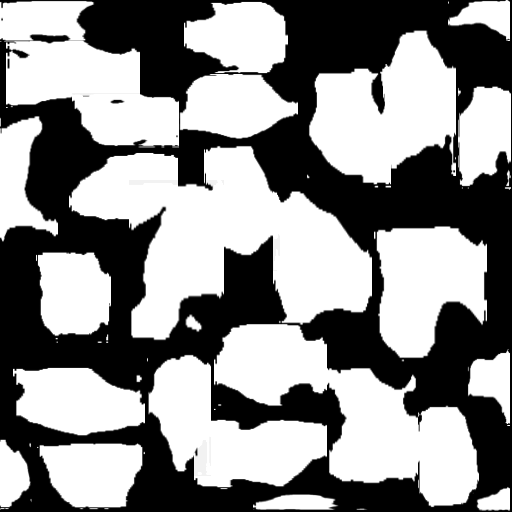

In [ ]:
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow

# Set directory path and file extension
dir_path = '/content/drive/MyDrive/dense cells/c3'
file_ext = '.png'


import re


# Get all image filenames in folder
img_filenames = [f for f in os.listdir(dir_path) if f.endswith(file_ext)]

# Load small images and their coordinates
imgs = []
coords = []
i=0
for filename in img_filenames:

    img = cv2.imread(os.path.join(dir_path, filename))

    pattern = r"\d+"

    # Extract integer from filename
    match = re.search(pattern, filename)

    if match:
        extracted_integer = int(match.group(0))
    else:
        print("No integer found in the filename.")
    coords.append(box[extracted_integer])
    i+=1  # replace with your own coordinates
    imgs.append(img)

# Determine size of output image
max_x = max([img.shape[1] + coord[0] for img, coord in zip(imgs, coords)])
max_y = max([img.shape[0] + coord[1] for img, coord in zip(imgs, coords)])
output_size = (512, 512)

# Scale coordinates and images to fit output size
scale_x = output_size[0] / max_x
scale_y = output_size[1] / max_y
for i in range(len(coords)):
    coords[i] = (int(coords[i][0] * scale_x), int(coords[i][1] * scale_y))
    imgs[i] = cv2.resize(imgs[i], (int(imgs[i].shape[1] * scale_x), int(imgs[i].shape[0] * scale_y)))

# Create blank output image
output = np.zeros((output_size[1], output_size[0], 3), np.uint8)

for img, coord in zip(imgs, coords):
    alpha = 0.95 # set alpha value for blending intensity
    beta = 1  # set beta value for opacity of destination image
    output[coord[1]:coord[1]+img.shape[0], coord[0]:coord[0]+img.shape[1]] = cv2.addWeighted(output[coord[1]:coord[1]+img.shape[0], coord[0]:coord[0]+img.shape[1]], alpha, img, beta, 0)




# Display and save output image
cv2_imshow(output)



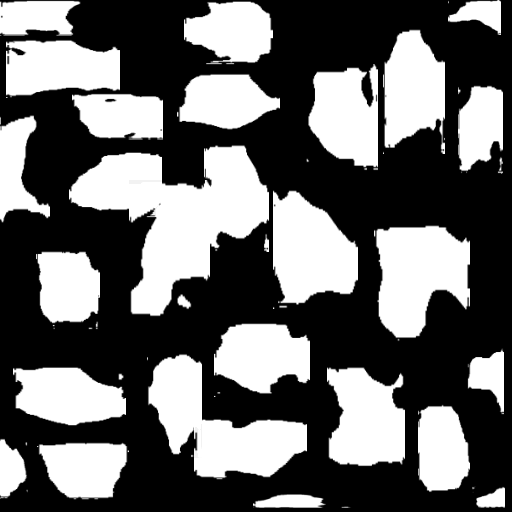

In [ ]:
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow

# Set directory path and file extension
dir_path = '/content/drive/MyDrive/dense cells/c3'
file_ext = '.png'

import re

# Get all image filenames in folder
img_filenames = [f for f in os.listdir(dir_path) if f.endswith(file_ext)]

# Load small images and their coordinates
imgs = []
coords = []
i = 0
for filename in img_filenames:
    img = cv2.imread(os.path.join(dir_path, filename))

    pattern = r"\d+"

    # Extract integer from filename
    match = re.search(pattern, filename)

    if match:
        extracted_integer = int(match.group(0))
    else:
        print("No integer found in the filename.")
    coords.append(box[extracted_integer])
    i += 1  # replace with your own coordinates
    imgs.append(img)

# Determine size of output image
max_x = max([img.shape[1] + coord[0] for img, coord in zip(imgs, coords)])
max_y = max([img.shape[0] + coord[1] for img, coord in zip(imgs, coords)])
output_size = (512, 512)

# Scale coordinates and resize images
scale_x = output_size[0] / max_x
scale_y = output_size[1] / max_y
for i in range(len(coords)):
    coords[i] = (int(coords[i][0] * scale_x), int(coords[i][1] * scale_y))
    width = int(imgs[i].shape[1] * 0.85)
    height = int(imgs[i].shape[0] * 0.85)
    imgs[i] = cv2.resize(imgs[i], (width, height))

# Create blank output image
output = np.zeros((output_size[1], output_size[0], 3), np.uint8)

for img, coord in zip(imgs, coords):
    alpha = 0.95 # set alpha value for blending intensity
    beta = 1  # set beta value for opacity of destination image
    output[coord[1]:coord[1]+img.shape[0], coord[0]:coord[0]+img.shape[1]] = cv2.addWeighted(output[coord[1]:coord[1]+img.shape[0], coord[0]:coord[0]+img.shape[1]], alpha, img, beta, 0)

# Display and save output image
cv2_imshow(output)


## UNET SHRI

['/content/images/c3.png']
(1, 512, 512, 1)
1/1 [==============================] - 10s 10s/step
Mean IoU = 0.19564247
(1, 512, 512, 1)
1/1 [==============================] - 8s 8s/step
(512, 512)


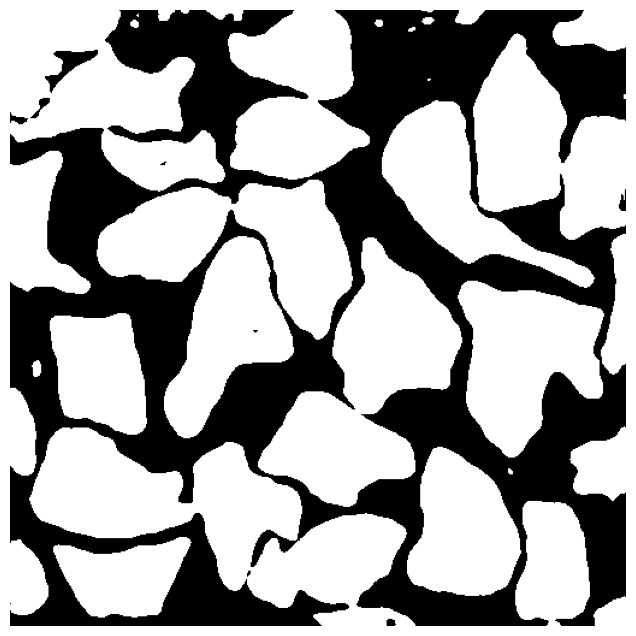

In [ ]:
import os
import skimage.io as io
import skimage.transform as trans
import shutil
import cv2
import matplotlib.pyplot as plt
import pickle
import time
from __future__ import print_function
import glob
import tensorflow as tf
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras
from tensorflow.keras.models import load_model as load_initial_model
import gc

def dice_coef(y_true, y_pred):
  smooth = 0.0
  y_true_f = keras.flatten(y_true)
  y_pred_f = keras.flatten(y_pred)
  intersection = keras.sum(y_true_f * y_pred_f)
  return (2. * intersection + smooth) / (keras.sum(y_true_f) +
keras.sum(y_pred_f) + smooth)

def jacard(y_true, y_pred):

  y_true_f = keras.flatten(y_true)
  y_pred_f = keras.flatten(y_pred)
  intersection = keras.sum ( y_true_f * y_pred_f)
  union = keras.sum ( y_true_f + y_pred_f - y_true_f * y_pred_f)

  return intersection/union

################
image_names = glob.glob("/content/images/*.png")
image_names.sort()
image_names_subset = image_names #[0:num_images]
images = [cv2.imread(img, 0) for img in image_names_subset]
print(image_names)

img = [cv2.resize(ing, (512,512)) for ing in images]

image_dataset = np.array(img)
image_dataset = np.expand_dims(image_dataset, axis = -1)
print(image_dataset.shape)

mask_names = glob.glob("/content/images/*.png")
mask_names.sort()
mask_names_subset = mask_names #[0:num_images]
masks = [cv2.imread(mask, cv2.IMREAD_GRAYSCALE) for mask in mask_names_subset]

mas = [cv2.resize(ing, (512,512)) for ing in masks]
mask_dataset = np.array(mas)
mask_dataset = np.expand_dims(mask_dataset, axis = -1)

#Normalize images
image_dataset = image_dataset /255.  #Can also normalize or scale using MinMax scaler
#Do not normalize masks, just rescale to 0 to 1.
mask_dataset = mask_dataset /255.  #PIxel values will be 0 or 1

import random

from keras.models import load_model
model = load_model('/content/drive/MyDrive/dicweights/unetoriginalhela.hdf5',compile = False)

##################
##################
#IOU
y_pred=model.predict(image_dataset)
y_pred_thresholded = y_pred > 0.5

###########
from tensorflow.keras.metrics import MeanIoU
n_classes = 2
IOU_keras = MeanIoU(num_classes=n_classes)
IOU_keras.update_state(y_pred_thresholded, mask_dataset)
print("Mean IoU =", IOU_keras.result().numpy())

threshold = 0.5
image_number = random.randint(0, len(image_dataset)-1)
test_img = image_dataset[image_number]
ground_truth=mask_dataset[image_number]
test_img_input=np.expand_dims(test_img, 0)
print(test_img_input.shape)
prediction = (model.predict(test_img_input)[0,:,:,0] > 0.5).astype(np.uint8)
print(prediction.shape)

plt.figure(figsize=(8, 8))
plt.imshow(cv2.resize(prediction, (512, 512)), cmap='gray')
plt.axis('off')
plt.show()



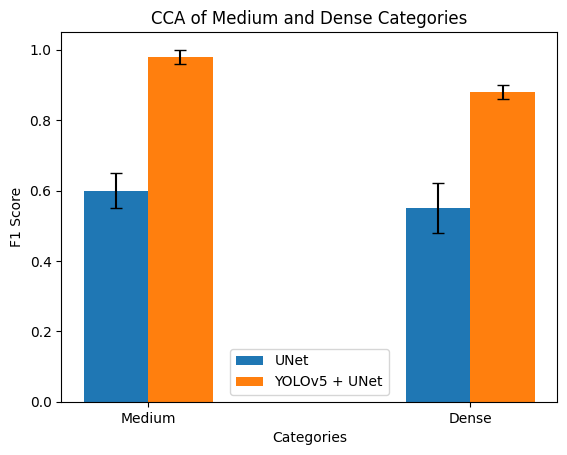

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
categories = ['Medium', 'Dense']
technique1_means = [0.6, 0.55]
technique1_stds = [0.05, 0.07]
technique2_means = [0.98, 0.88]
technique2_stds = [0.02, 0.02]

# Define the width of the bars
bar_width = 0.2

# Set the x-axis positions for the bars
x = np.arange(len(categories))

# Create figure and axis objects
fig, ax = plt.subplots()

# Plot bars for technique 1 with error bars
ax.bar(x - bar_width/2, technique1_means, yerr=technique1_stds, capsize=4,
       label='UNet', width=bar_width)

# Plot bars for technique 2 with error bars
ax.bar(x + bar_width/2, technique2_means, yerr=technique2_stds, capsize=4,
       label='YOLOv5 + UNet', width=bar_width)

# Set labels and title
ax.set_xlabel('Categories')
ax.set_ylabel('F1 Score')
ax.set_title('CCA of Medium and Dense Categories')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Show the plot
plt.show()


## Size Calculation

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


12
    label  area  major_axis_length       area1
1       2  1202          43.272692  156.645842
4       5   622          31.101504   81.059662
5       6  1282          44.291746  167.071522
6       7  1227          43.724765  159.903867
9      10  1457          47.846419  189.877697
10     11  1602          59.189914  208.774242
12     13   988          36.226044  128.757148
13     14  1139          41.157330  148.435619
14     15  1244          41.277158  162.119324
15     16  1199          43.126074  156.254879
16     17  1884          53.844454  245.524764
19     20  1429          47.112864  186.228709
20     21  1289          42.676751  167.983769
21     22  1349          45.998458  175.803029
22     23  1400          55.410478  182.449400
23     24  2473          95.075971  322.283833
24     25  1386          43.885143  180.624906
25     26   849          35.358753  110.642529
26     27   786          43.458584  102.432306
27     28   714          34.266129   93.049194
29     30 

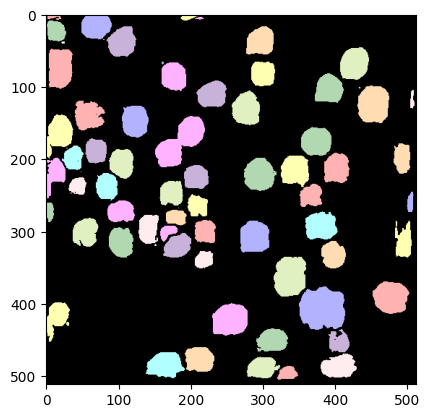

In [ ]:
# from skimage import measure, io, img_as_ubyte
# import matplotlib.pyplot as plt
# from skimage.color import label2rgb, rgb2gray
# import numpy as np
# import cv2
# ##########################
# prediction2 = cv2.imread('/content/t1.png',
# cv2.IMREAD_GRAYSCALE)
# # plt.imshow(prediction, cmap='gray')
# print(np.unique(prediction2))
# prediction1 = cv2.resize(prediction2, (512, 512))

# plt.imshow(prediction1, cmap='gray')
# # scale = 1.137 #microns/pixel
# scale = 0.361 #microns/pixel
# prediction1 = prediction1/255
# print(np.unique(prediction1))
# prediction = (prediction1[:,]>0.5)
# print(np.unique(prediction))

# from skimage.filters import threshold_otsu
# threshold = threshold_otsu(prediction)

# #Generate thresholded prediction
# thresholded_img = prediction > threshold
# plt.imshow(thresholded_img)

# #################################################
# label_image = measure.label(thresholded_img, connectivity=prediction.ndim)
# plt.imshow(label_image)
# #Return an RGB image where color-coded labels are painted over the image.
# #Using label2rgb

# image_label_overlay = label2rgb(label_image, image=prediction)
# plt.imshow(image_label_overlay)


# unique_values = np.unique(image_label_overlay)
# print(len(np.unique(image_label_overlay)))

# # plt.imsave("C:/Users/Bioimaging/shrirang_IPW/hell_cells_extracetd/a11_samyak.png",
# # image_label_overlay, cmap='gray')
# # plt.imsave("C:/Users/Bioimaging/shrirang_IPW/hell_cells_extracetd/wa_deepika.png",
# # label_image, cmap='gray')

# #################################################
# #Calculate properties
# #Using regionprops or regionprops_table
# all_props=measure.regionprops(label_image, prediction)
# #Can print various parameters for all objects

# props = measure.regionprops_table(label_image, prediction,
#                           properties=['label',
#                                       'area',
#                                       'major_axis_length'])

# # props = measure.regionprops_table(label_image, prediction,
# #                           properties=['major_axis_length'])


# # for prop in all_props:
# #     print('Label: {} Area: {}'.format(prop.label, prop.area))

# import pandas as pd
# df = pd.DataFrame(props)
# df['area1'] = df['area']*(scale)*(scale)
# df = df[df['area1'] > 31]
# print(df.head(1000))

# # print(df2.head(1000))
# # df['area'] = df['area'] * (scale**2)

# # df['equivalent_diameter_microns'] = df['equivalent_diameter'] * (scale)

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


    label  area  major_axis_length  centroid-0  centroid-1       area1
0       1  1855          68.147295   15.991914  284.607547  241.745455
1       2   978          47.797509   12.252556  458.364008  127.453938
2       3  1528          47.596410   22.132199  197.142670  199.130488
3       4   812          46.703422   45.105911   10.983990  105.820652
4       5  1970          51.315804   47.509137  147.704061  256.732370
5       6   930          36.468887   49.182796  461.111828  121.198530
6       7  1251          42.433705   56.551559  309.275779  163.031571
9      10  1475          44.675667   86.919322   69.006780  192.223475
10     11  1373          44.420450   87.351056  435.964312  178.930733
11     12  1791          53.709740   96.528755  126.014517  233.404911
12     13  2119          58.534689  104.015101  386.010854  276.150199
14     15  1070          37.533007  105.340187  176.800935  139.443470
15     16  1418          49.975284  137.957687  297.992948  184.795178
17    

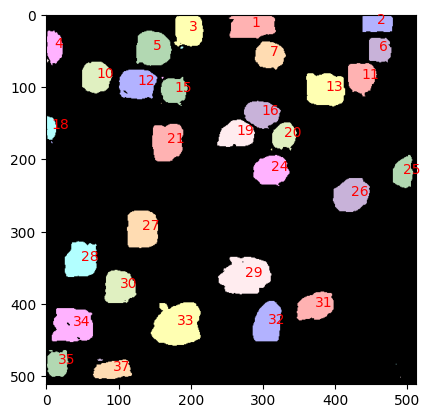

In [ ]:
from skimage import measure, io, img_as_ubyte
import matplotlib.pyplot as plt
from skimage.color import label2rgb, rgb2gray
import numpy as np
import cv2
import pandas as pd

##########################
prediction2 = cv2.imread('/content/t1.png', cv2.IMREAD_GRAYSCALE)
prediction1 = cv2.resize(prediction2, (512, 512))

plt.imshow(prediction1, cmap='gray')
scale = 0.361 # microns/pixel
prediction1 = prediction1 / 255

prediction = (prediction1[:,] > 0.5)

from skimage.filters import threshold_otsu
threshold = threshold_otsu(prediction)

thresholded_img = prediction > threshold

label_image = measure.label(thresholded_img, connectivity=prediction.ndim)

image_label_overlay = label2rgb(label_image, image=prediction)
plt.imshow(image_label_overlay)

props = measure.regionprops_table(label_image, prediction,
                                  properties=['label', 'area', 'major_axis_length', 'centroid'])

df = pd.DataFrame(props)
df['area1'] = df['area'] * (scale) * (scale)
df = df[df['area1'] > 30]
print(df.head(1000))
i=1
for index, row in df.iterrows():
    #label = i
    label= row['label']
    area = row['area1']
    centroid_y = row['centroid-0']  # y-coordinate
    centroid_x = row['centroid-1']  # x-coordinate

    plt.text(centroid_x, centroid_y, f"{int(label)}", color='red')
    i+=1


plt.show()


In [ ]:
df['area1']
column_array3 = df['area1'].values

print(column_array3)

[241.745455 127.453938 199.130488 105.820652 256.73237  121.19853
 163.031571 192.223475 178.930733 233.404911 276.150199 139.44347
 184.795178  45.742671 193.135722 127.062975 249.695036 209.686489
 124.326234 242.788023 259.33879  239.008714 377.539937 213.465798
 205.255575 234.317158 423.021966 296.740917 117.940505 144.004705]


<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


    label  area  major_axis_length  centroid-0  centroid-1       area1
1       2  1284          43.217595   21.003115  474.792056  167.332164
2       3  1433          51.539065   25.167481  199.421493  186.749993
3       4  1527          48.574430   45.375900  139.337917  199.000167
4       5   775          43.672239   60.904516   11.509677  100.998775
5       6  1018          37.211155   58.211198  464.928291  132.666778
6       7   958          36.264871   65.618998  297.543841  124.847518
9      10   871          35.910678   96.755454  438.575201  113.509591
11     12  1329          44.584875  104.401806  135.088789  173.196609
13     14   876          38.424296  109.648402  184.464612  114.161196
15     16  1377          47.102723  115.562818   71.240378  179.452017
16     17  1322          49.830670  116.854009  396.442511  172.284362
19     20  1094          40.393606  148.794333  309.963437  142.571174
22     23   509          44.091199  164.550098    7.669941   66.333389
23    

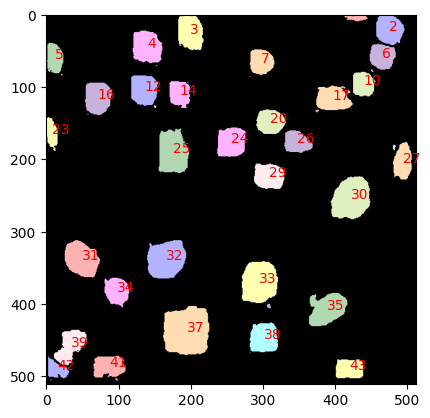

In [ ]:
from skimage import measure, io, img_as_ubyte
import matplotlib.pyplot as plt
from skimage.color import label2rgb, rgb2gray
import numpy as np
import cv2
import pandas as pd

##########################
prediction3 = cv2.imread('/content/t15.png', cv2.IMREAD_GRAYSCALE)
prediction1 = cv2.resize(prediction3, (512, 512))

plt.imshow(prediction1, cmap='gray')
scale = 0.361 # microns/pixel
prediction1 = prediction1 / 255

prediction = (prediction1[:,] > 0.5)

from skimage.filters import threshold_otsu
threshold = threshold_otsu(prediction)

thresholded_img = prediction > threshold

label_image = measure.label(thresholded_img, connectivity=prediction.ndim)

image_label_overlay = label2rgb(label_image, image=prediction)
plt.imshow(image_label_overlay)

props = measure.regionprops_table(label_image, prediction,
                                  properties=['label', 'area', 'major_axis_length', 'centroid'])

df1 = pd.DataFrame(props)
df1['area1'] = df1['area'] * (scale) * (scale)
df1 = df1[df1['area1'] > 30]
print(df1.head(1000))
i=1
for index, row in df1.iterrows():
    #label = i
    label= row['label']
    area = row['area1']
    centroid_y = row['centroid-0']  # y-coordinate
    centroid_x = row['centroid-1']  # x-coordinate

    plt.text(centroid_x, centroid_y, f"{int(label)}", color='red')
    i+=1


plt.show()


In [ ]:
df1['area1']
column_array4 = df1['area1'].values

print(column_array4)

[167.332164 186.749993 199.000167 100.998775 132.666778 124.847518
 113.509591 173.196609 114.161196 179.452017 172.284362 142.571174
  66.333389 181.015869 276.150199 119.113394 132.275815 162.249645
 328.40892  238.226788 301.171831 315.767783 136.055124 232.622985
 478.538712 180.755227 166.419917 143.3531    66.984994 121.068209]


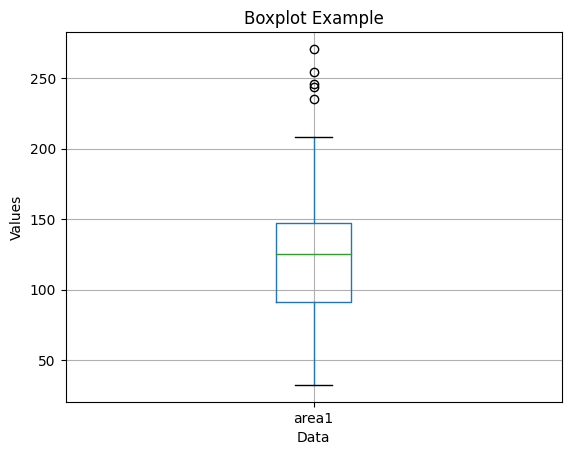

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create the boxplot
df.boxplot(column='area1')

# Set the title and labels
plt.title('Boxplot Example')
plt.xlabel('Data')
plt.ylabel('Values')

# Show the plot
plt.show()


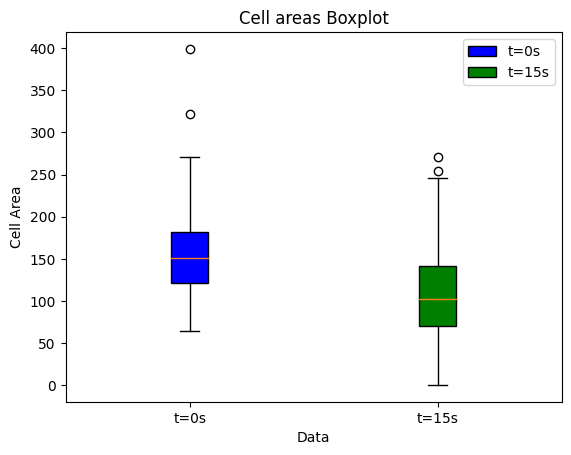

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have two DataFrames df and df1 with a column named 'area1'

# Create a figure and axis object
fig, ax = plt.subplots()

# Create the side-by-side boxplots
boxplot1 = ax.boxplot(df['area1'], positions=[1], patch_artist=True)
boxplot2 = ax.boxplot(df1['area1'], positions=[2], patch_artist=True)

# Customize the boxplot colors
boxplot1['boxes'][0].set_facecolor('blue')
boxplot2['boxes'][0].set_facecolor('green')

# Set the title and labels
plt.title('Cell areas Boxplot')
plt.xlabel('Data')
plt.ylabel('Cell Area')

# Set the x-axis tick labels
ax.set_xticks([1, 2])
ax.set_xticklabels(['t=0s', 't=15s'])

# Show the legend
ax.legend([boxplot1['boxes'][0], boxplot2['boxes'][0]], ['t=0s', 't=15s'])

# Show the plot
plt.show()


## ANOVA

In [ ]:
import scipy.stats as stats

# Define your data
control_initial = column_array3 # Cell area sizes for control at initial time point
control_final = column_array4  # Cell area sizes for control at final time point
drug_initial = column_array    # Cell area sizes for drug-induced at initial time point
drug_final = column_array1        # Cell area sizes for drug-induced at final time point

# Perform one-way ANOVA
fvalue, pvalue = stats.f_oneway( drug_initial, drug_final)

# Print the results
print("F-value:", fvalue)
print("p-value:", pvalue)

# Interpret the results
alpha = 0.05  # Set significance level
if pvalue < alpha:
    print("Reject the null hypothesis. There is a significant difference in cell shrinkage between control and drug-induced cases.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in cell shrinkage between control and drug-induced cases.")


F-value: 5.157657529175647
p-value: 0.025072864699457187
Reject the null hypothesis. There is a significant difference in cell shrinkage between control and drug-induced cases.


In [ ]:
import scipy.stats as stats
import numpy as np

# Define your data
initial_time = column_array  # Cell area sizes for drug-induced at initial time point
final_time = column_array1   # Cell area sizes for drug-induced at final time point

# Check array lengths and adjust if necessary
min_length = min(len(initial_time), len(final_time))
initial_time = initial_time[:min_length]
final_time = final_time[:min_length]

# Perform paired t-test
t_statistic, p_value = stats.ttest_rel(initial_time, final_time)

# Print the results
print("T-statistic:", t_statistic)
print("p-value:", p_value)

# Interpret the results
alpha = 0.05  # Set significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in cell area between the initial and final time points for the drug-induced group.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in cell area between the initial and final time points for the drug-induced group.")


T-statistic: 2.526713303102173
p-value: 0.014420057224866037
Reject the null hypothesis. There is a significant difference in cell area between the initial and final time points for the drug-induced group.


In [ ]:
import scipy.stats as stats

# Define your data
control_initial = column_array3  # Cell area sizes for control at initial time point
control_final = column_array4    # Cell area sizes for control at final time point

# Perform one-sample t-test
t_statistic, p_value = stats.ttest_1samp(control_final, control_initial.mean())

# Print the results
print("T-statistic:", t_statistic)
print("p-value:", p_value)

# Interpret the results
alpha = 0.05  # Set significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in cell area between the initial and final time points for the control group.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in cell area between the initial and final time points for the control group.")


T-statistic: -1.401402023414088
p-value: 0.17170574718326392
Fail to reject the null hypothesis. There is no significant difference in cell area between the initial and final time points for the control group.


In [ ]:
from scipy.stats import mannwhitneyu

# Control group data
control_initial = column_array3
control_final = column_array4

# Drug-induced group data
drug_initial = column_array
drug_final = column_array1

# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(control_final, drug_final, alternative='less')

# Print the test results
print("Mann-Whitney U statistic:", statistic)
print("p-value:", p_value)


Mann-Whitney U statistic: 1238.0
p-value: 0.9996922430292592


In [ ]:
import scipy.stats as stats
import numpy as np

# Define your data
control_initial = column_array3  # Cell area sizes for control at initial time point
control_final = column_array4    # Cell area sizes for control at final time point
drug_initial = column_array      # Cell area sizes for drug-induced at initial time point
drug_final = column_array1       # Cell area sizes for drug-induced at final time point

# Check array lengths and adjust if necessary
lengths = [len(control_initial), len(control_final), len(drug_initial), len(drug_final)]
max_length = max(lengths)

control_initial = np.pad(control_initial, (0, max_length - len(control_initial)), mode='constant')
control_final = np.pad(control_final, (0, max_length - len(control_final)), mode='constant')
drug_initial = np.pad(drug_initial, (0, max_length - len(drug_initial)), mode='constant')
drug_final = np.pad(drug_final, (0, max_length - len(drug_final)), mode='constant')

# Combine the data into a single array for each factor
control = np.concatenate([control_initial, control_final])
drug = np.concatenate([drug_initial, drug_final])
initial = np.concatenate([control_initial, drug_initial])
final = np.concatenate([control_final, drug_final])

# Perform two-way ANOVA
fvalue, pvalue = stats.f_oneway(control, drug, initial, final)

# Print the results
print("F-value:", fvalue)
print("p-value:", pvalue)

# Interpret the results
alpha = 0.05  # Set significance level
if pvalue < alpha:
    print("Reject the null hypothesis. There is a significant difference in cell shrinkage between control and drug-induced cases.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in cell shrinkage between control and drug-induced cases.")


F-value: 3.496028970067866
p-value: 0.01559961972149738
Reject the null hypothesis. There is a significant difference in cell shrinkage between control and drug-induced cases.


## For single cell area line chart

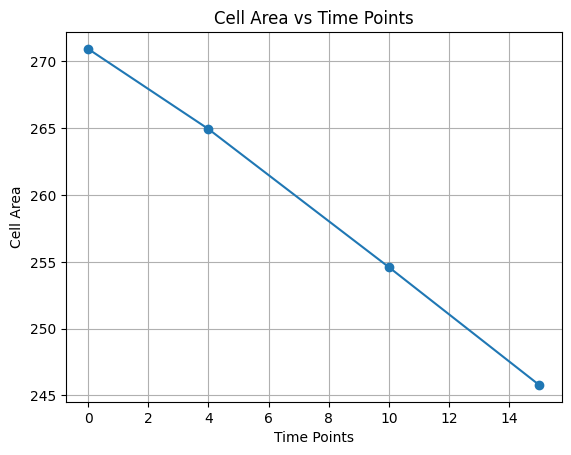

In [ ]:
import matplotlib.pyplot as plt

time_points = [0, 4, 10, 15]
cell_area = [270.937359,264.94,254.603,245.785]  # Replace with your actual cell area values

plt.plot(time_points, cell_area, marker='o')
plt.xlabel('Time Points')
plt.ylabel('Cell Area')
plt.title('Cell Area vs Time Points')
plt.grid(True)
plt.show()


## ROS Area Calculation

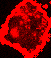

Red area: 603.592


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def find_red_area(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Convert the image from BGR to HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define the lower and upper thresholds for red color
    lower_red = np.array([0, 50, 50])
    upper_red = np.array([10, 255, 255])
    lower_red2 = np.array([170, 50, 50])
    upper_red2 = np.array([180, 255, 255])

    # Create a mask using the thresholds
    mask1 = cv2.inRange(hsv_image, lower_red, upper_red)
    mask2 = cv2.inRange(hsv_image, lower_red2, upper_red2)
    mask = cv2.bitwise_or(mask1, mask2)

    # Find contours in the mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Calculate the area of each contour and sum them up
    red_area = 0
    for contour in contours:
        red_area += cv2.contourArea(contour)

    cv2.drawContours(image, contours, -1, (0, 0, 255), 2)

    # Display the image
    cv2_imshow(image)
    return red_area

# Path to the image file
image_path = "/content/tt15.png"

# Call the function to find the red area
red_area = find_red_area(image_path)

# Print the red area
print("Red area:", red_area*0.361)


##F1 scores at different thresholds

In [ ]:
import numpy as np
import torch
from torchvision.ops import box_iou
from PIL import Image

def calculate_iou(box1, box2):
    # Calculate the intersection coordinates
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])

    # Calculate intersection area
    intersection_area = max(0, x2 - x1 + 1) * max(0, y2 - y1 + 1)

    # Calculate box1 and box2 areas
    box1_area = (box1[2] - box1[0] + 1) * (box1[3] - box1[1] + 1)
    box2_area = (box2[2] - box2[0] + 1) * (box2[3] - box2[1] + 1)

    # Calculate IoU
    iou = intersection_area / float(box1_area + box2_area - intersection_area)
    return iou

def calculate_f1_score(predictions, targets, threshold):
    tp = 0
    fp = 0
    fn = 0

    for pred_box in predictions:
        iou_max = 0

        for target_box in targets:
            iou = calculate_iou(pred_box, target_box)
            if iou > iou_max:
                iou_max = iou

        if iou_max >= threshold:
            tp += 1
        else:
            fp += 1

    fn = len(targets) - tp

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * (precision * recall) / (precision + recall)

    return f1_score

# Load YOLOv5 model architecture
model = torch.hub.load('ultralytics/yolov5', 'custom', '/content/drive/MyDrive/helabest.pt')

# Set the model to evaluation mode
model.eval()

# Example usage
image_path = '/content/train_data/images/val/b3.png'
gt_file_path = '/content/train_data/labels/val/b3.txt'

# Load image
image = Image.open(image_path)

# Read ground truth bounding box coordinates from file
with open(gt_file_path, 'r') as f:
    gt_lines = f.readlines()

ground_truth_boxes = []
for line in gt_lines:
    # Assuming format: class_index x_center y_center width height
    class_index, x_center, y_center, width, height = map(float, line.split())
    x1 = int((x_center - width / 2) * image.width)
    y1 = int((y_center - height / 2) * image.height)
    x2 = int((x_center + width / 2) * image.width)
    y2 = int((y_center + height / 2) * image.height)
    ground_truth_boxes.append([x1, y1, x2, y2])

# Run YOLOv5 on the image and obtain predicted bounding boxes
with torch.no_grad():
    predictions = model(image)

# Convert predicted bounding boxes to the same format as ground truth
# Assuming format: class_index confidence x_center y_center width height
predicted_boxes = []
for pred_box in predictions.xyxy[0]:
    class_index = int(pred_box[5])
    confidence = pred_box[4]
    x1, y1, x2, y2 = map(int, pred_box[:4])
    predicted_boxes.append([x1, y1, x2, y2])

# Define the IoU threshold
threshold = 0.8

# Calculate F1 score
f1_score = calculate_f1_score(predicted_boxes, ground_truth_boxes, threshold)
print(f"F1 Score: {f1_score}")


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-168-gec2b853 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)



requirements: /usr/local/lib/python3.10/dist-packages/requirements.txt not found, check failed.


Fusing layers... 
Model summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
Adding AutoShape... 


F1 Score: 0.5714285714285714


In [ ]:
import os
import numpy as np
import torch
from torchvision.ops import box_iou
from PIL import Image


def calculate_iou(box1, box2):
    # Calculate the intersection coordinates
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])

    # Calculate intersection area
    intersection_area = max(0, x2 - x1 + 1) * max(0, y2 - y1 + 1)

    # Calculate box1 and box2 areas
    box1_area = (box1[2] - box1[0] + 1) * (box1[3] - box1[1] + 1)
    box2_area = (box2[2] - box2[0] + 1) * (box2[3] - box2[1] + 1)

    # Calculate IoU
    iou = intersection_area / float(box1_area + box2_area - intersection_area)
    return iou


def calculate_f1_score(predictions, targets, threshold):
    tp = 0
    fp = 0
    fn = 0

    for pred_box in predictions:
        iou_max = 0

        for target_box in targets:
            iou = calculate_iou(pred_box, target_box)
            if iou > iou_max:
                iou_max = iou

        if iou_max >= threshold:
            tp += 1
        else:
            fp += 1

    fn = len(targets) - tp

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * (precision * recall) / (precision + recall)

    return f1_score


# Load YOLOv5 model architecture
model = torch.hub.load('ultralytics/yolov5', 'custom', '/content/drive/MyDrive/helabest.pt')

# Set the model to evaluation mode
model.eval()

image_folder = '/content/train_data/images/val'
gt_folder = '/content/train_data/labels/val'

# Iterate through the image files in the folder
for filename in os.listdir(image_folder):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        # Construct the paths for the current image and ground truth file
        image_path = os.path.join(image_folder, filename)
        gt_filename = os.path.splitext(filename)[0] + '.txt'
        gt_path = os.path.join(gt_folder, gt_filename)

        # Load image
        image = Image.open(image_path)

        # Read ground truth bounding box coordinates from file
        with open(gt_path, 'r') as f:
            gt_lines = f.readlines()

        ground_truth_boxes = []
        for line in gt_lines:
            # Assuming format: class_index x_center y_center width height
            class_index, x_center, y_center, width, height = map(float, line.split())
            x1 = int((x_center - width / 2) * image.width)
            y1 = int((y_center - height / 2) * image.height)
            x2 = int((x_center + width / 2) * image.width)
            y2 = int((y_center + height / 2) * image.height)
            ground_truth_boxes.append([x1, y1, x2, y2])

        # Run YOLOv5 on the image and obtain predicted bounding boxes
        with torch.no_grad():
            predictions = model(image)

        # Convert predicted bounding boxes to the same format as ground truth
        # Assuming format: class_index confidence x_center y_center width height
        predicted_boxes = []
        for pred_box in predictions.xyxy[0]:
            class_index = int(pred_box[5])
            confidence = pred_box[4]
            x1, y1, x2, y2 = map(int, pred_box[:4])
            predicted_boxes.append([x1, y1, x2, y2])

        # Define the IoU threshold
        threshold = 0.8

        # Calculate F1 score
        f1_score = calculate_f1_score(predicted_boxes, ground_truth_boxes, threshold)
        print(f"Image: {filename}, F1 Score: {f1_score}")


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-168-gec2b853 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 


requirements: /usr/local/lib/python3.10/dist-packages/requirements.txt not found, check failed.


Model summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
Adding AutoShape... 


Image: b5.png, F1 Score: 0.47619047619047616
Image: b3.png, F1 Score: 0.5714285714285714
Image: b4.png, F1 Score: 0.6111111111111112


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-6-19 Python-3.10.12 torch-2.0.1+cu118 CPU

Fusing layers... 
Model summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
Adding AutoShape... 


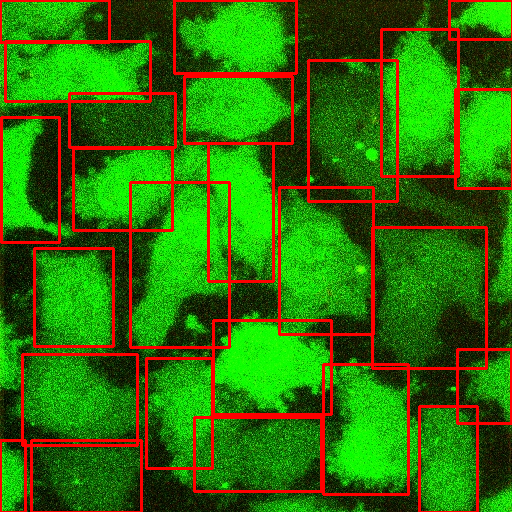

In [ ]:
import torch
import torchvision
import cv2
from google.colab.patches import cv2_imshow
# Load the YOLOv5 model

model = torch.hub.load('ultralytics/yolov5', 'custom', '/content/drive/MyDrive/helabest.pt')

# # Set the model to inference mode
# model.eval()

# Path to the input image
image_path = '/content/images/c3.png'

# Path to the ground truth annotations file
gt_file = '/content/c3.txt'

# Load the ground truth annotations
with open(gt_file, 'r') as file:
    gt_annotations = file.readlines()

# Load the input image
image = cv2.imread(image_path)

# Perform inference
results = model(image)

# Get the predicted bounding boxes, labels, and confidence scores
predictions = results.xyxy[0]
gt_boxes = [annotation.split(' ')[1:] for annotation in gt_annotations]

gt_color = (0, 0,255)  # Green
pred_color = (255, 0, 0)  # Red
# Draw ground truth annotations
for annotation in gt_annotations:
    values = annotation.strip().split(' ')
    label = int(values[0])
    x_center, y_center, width, height = [float(val) for val in values[1:]]
    x_min = int((x_center - width / 2) * image.shape[1])
    y_min = int((y_center - height / 2) * image.shape[0])
    x_max = int((x_center + width / 2) * image.shape[1])
    y_max = int((y_center + height / 2) * image.shape[0])
    cv2.rectangle(image, (x_min, y_min), (x_max, y_max), gt_color, 2)


# # Draw predicted bounding boxes
# for prediction in predictions:
#     x_min, y_min, x_max, y_max, confidence, label = prediction
#     x_min, y_min, x_max, y_max = int(x_min), int(y_min), int(x_max), int(y_max)

#     cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)

# Display the image
cv2_imshow(image)


# 2. Validate
Validate a model's accuracy on the [COCO](https://cocodataset.org/#home) dataset's `val` or `test` splits. Models are downloaded automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases). To show results by class use the `--verbose` flag.

In [ ]:
# Download COCO val
torch.hub.download_url_to_file('https://ultralytics.com/assets/coco2017val.zip', 'tmp.zip')  # download (780M - 5000 images)
!unzip -q tmp.zip -d ../datasets && rm tmp.zip  # unzip

  0%|          | 0.00/780M [00:00<?, ?B/s]

In [ ]:
# Validate YOLOv5s on COCO val
!python val.py --weights yolov5s.pt --data coco.yaml --img 640 --half

val: data=/content/yolov5/data/coco.yaml, weights=['yolov5s.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=True, project=runs/val, name=exp, exist_ok=False, half=True, dnn=False
YOLOv5 🚀 v7.0-1-gb32f67f Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
val: Scanning /content/datasets/coco/val2017... 4952 images, 48 backgrounds, 0 corrupt: 100% 5000/5000 [00:02<00:00, 1977.30it/s]
val: New cache created: /content/datasets/coco/val2017.cache
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 157/157 [01:12<00:00,  2.17it/s]
                   all       5000      36335       0.67      0.521      0.566      0.371
Speed: 0.1ms pre-process, 2.9ms inference, 2.0ms NMS per image at shape (32, 

# 3. Train

<p align=""><a href="https://roboflow.com/?ref=ultralytics"><img width="1000" src="https://github.com/ultralytics/assets/raw/main/im/integrations-loop.png"/></a></p>
Close the active learning loop by sampling images from your inference conditions with the `roboflow` pip package
<br><br>

Train a YOLOv5s model on the [COCO128](https://www.kaggle.com/ultralytics/coco128) dataset with `--data coco128.yaml`, starting from pretrained `--weights yolov5s.pt`, or from randomly initialized `--weights '' --cfg yolov5s.yaml`.

- **Pretrained [Models](https://github.com/ultralytics/yolov5/tree/master/models)** are downloaded
automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases)
- **[Datasets](https://github.com/ultralytics/yolov5/tree/master/data)** available for autodownload include: [COCO](https://github.com/ultralytics/yolov5/blob/master/data/coco.yaml), [COCO128](https://github.com/ultralytics/yolov5/blob/master/data/coco128.yaml), [VOC](https://github.com/ultralytics/yolov5/blob/master/data/VOC.yaml), [Argoverse](https://github.com/ultralytics/yolov5/blob/master/data/Argoverse.yaml), [VisDrone](https://github.com/ultralytics/yolov5/blob/master/data/VisDrone.yaml), [GlobalWheat](https://github.com/ultralytics/yolov5/blob/master/data/GlobalWheat2020.yaml), [xView](https://github.com/ultralytics/yolov5/blob/master/data/xView.yaml), [Objects365](https://github.com/ultralytics/yolov5/blob/master/data/Objects365.yaml), [SKU-110K](https://github.com/ultralytics/yolov5/blob/master/data/SKU-110K.yaml).
- **Training Results** are saved to `runs/train/` with incrementing run directories, i.e. `runs/train/exp2`, `runs/train/exp3` etc.
<br><br>

A **Mosaic Dataloader** is used for training which combines 4 images into 1 mosaic.

## Train on Custom Data with Roboflow 🌟 NEW

[Roboflow](https://roboflow.com/?ref=ultralytics) enables you to easily **organize, label, and prepare** a high quality dataset with your own custom data. Roboflow also makes it easy to establish an active learning pipeline, collaborate with your team on dataset improvement, and integrate directly into your model building workflow with the `roboflow` pip package.

- Custom Training Example: [https://blog.roboflow.com/how-to-train-yolov5-on-a-custom-dataset/](https://blog.roboflow.com/how-to-train-yolov5-on-a-custom-dataset/?ref=ultralytics)
- Custom Training Notebook: [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/roboflow-ai/yolov5-custom-training-tutorial/blob/main/yolov5-custom-training.ipynb)
<br>

<p align=""><a href="https://roboflow.com/?ref=ultralytics"><img width="480" src="https://uploads-ssl.webflow.com/5f6bc60e665f54545a1e52a5/6152a275ad4b4ac20cd2e21a_roboflow-annotate.gif"/></a></p>Label images lightning fast (including with model-assisted labeling)

In [ ]:
#@title Select YOLOv5 🚀 logger {run: 'auto'}
logger = 'ClearML' #@param ['ClearML', 'Comet', 'TensorBoard']

if logger == 'ClearML':
  %pip install -q clearml
  import clearml; clearml.browser_login()
elif logger == 'Comet':
  %pip install -q comet_ml
  import comet_ml; comet_ml.init()
elif logger == 'TensorBoard':
  %load_ext tensorboard
  %tensorboard --logdir runs/train

In [ ]:
# Train YOLOv5s on COCO128 for 3 epochs
!python train.py --img 640 --batch 16 --epochs 5 --data /content/yolov5/data/custom_data.yaml --weights yolov5s.pt --cache

WARNING ⚠️ 'ultralytics.yolo.v8' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.models.yolo' instead.
WARNING ⚠️ 'ultralytics.yolo.utils' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.utils' instead.
Note this warning may be related to loading older models. You can update your model to current structure with:
    import torch
    ckpt = torch.load("model.pt")  # applies to both official and custom models
    torch.save(ckpt, "updated-model.pt")

train: weights=yolov5s.pt, cfg=, data=/content/yolov5/data/custom_data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=5, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, 

In [ ]:
from google.colab import files

# Provide the path to the file you want to download
file_path = '/content/yolov5/runs/train/exp/weights/best.pt'

# Use the files.download() function to download the file
files.download(file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Train YOLOv5s on COCO128 for 3 epochs
!python train.py --img 640 --batch 16 --epochs 500 --data /content/yolov5/data/custom_data.yaml --weights yolov5s.pt --cache --hyp hypnew.yaml

train: weights=yolov5s.pt, cfg=, data=/content/yolov5/data/custom_data.yaml, hyp=hypnew.yaml, epochs=500, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
Traceback (most recent call last):
  File "/content/yolov5/train.py", line 647, in <module>
    main(opt)
  File "/content/yolov5/train.py", line 511, in main
    check_file(opt.data), check_yaml(opt.cfg), check_yaml(opt.hyp), str(opt.weights), str(opt.project)  # checks
  File "/content/yolov5/utils/general.py", line 432, in check_yaml
   

In [ ]:
!python train.py --img 640 --batch 16 --epochs 700 --data custom_data.yaml --weights yolov5m.pt --cache --hyp hypnew.yaml

train: weights=yolov5m.pt, cfg=, data=custom_data.yaml, hyp=hypnew.yaml, epochs=700, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
Traceback (most recent call last):
  File "/content/yolov5/train.py", line 647, in <module>
    main(opt)
  File "/content/yolov5/train.py", line 511, in main
    check_file(opt.data), check_yaml(opt.cfg), check_yaml(opt.hyp), str(opt.weights), str(opt.project)  # checks
  File "/content/yolov5/utils/general.py", line 432, in check_yaml
    return check_file(fi

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="pvc2NWOkXocDAAiglFuO")
project = rf.workspace("iit-fijvp").project("123-cqhrs")
dataset = project.version(1).download("yolov5")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.0/49.0 KB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 6.7 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=252c72bf7ece684a0288f5e014a231174e511b863a25f6d09b8ff47f32cc269e
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pypars

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to 123-1 in yolov5pytorch:: 100%|██████████| 8/8 [00:00<00:00, 1848.02it/s]


Segmentation


# 4. Visualize

## Comet Logging and Visualization 🌟 NEW

[Comet](https://www.comet.com/site/lp/yolov5-with-comet/?utm_source=yolov5&utm_medium=partner&utm_campaign=partner_yolov5_2022&utm_content=yolov5_colab) is now fully integrated with YOLOv5. Track and visualize model metrics in real time, save your hyperparameters, datasets, and model checkpoints, and visualize your model predictions with [Comet Custom Panels](https://www.comet.com/docs/v2/guides/comet-dashboard/code-panels/about-panels/?utm_source=yolov5&utm_medium=partner&utm_campaign=partner_yolov5_2022&utm_content=yolov5_colab)! Comet makes sure you never lose track of your work and makes it easy to share results and collaborate across teams of all sizes!

Getting started is easy:
```shell
pip install comet_ml  # 1. install
export COMET_API_KEY=<Your API Key>  # 2. paste API key
python train.py --img 640 --epochs 3 --data coco128.yaml --weights yolov5s.pt  # 3. train
```
To learn more about all of the supported Comet features for this integration, check out the [Comet Tutorial](https://github.com/ultralytics/yolov5/tree/master/utils/loggers/comet). If you'd like to learn more about Comet, head over to our [documentation](https://www.comet.com/docs/v2/?utm_source=yolov5&utm_medium=partner&utm_campaign=partner_yolov5_2022&utm_content=yolov5_colab). Get started by trying out the Comet Colab Notebook:
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1RG0WOQyxlDlo5Km8GogJpIEJlg_5lyYO?usp=sharing)

<a href="https://bit.ly/yolov5-readme-comet2">
<img alt="Comet Dashboard" src="https://user-images.githubusercontent.com/26833433/202851203-164e94e1-2238-46dd-91f8-de020e9d6b41.png" width="1280"/></a>

## ClearML Logging and Automation 🌟 NEW

[ClearML](https://cutt.ly/yolov5-notebook-clearml) is completely integrated into YOLOv5 to track your experimentation, manage dataset versions and even remotely execute training runs. To enable ClearML (check cells above):

- `pip install clearml`
- run `clearml-init` to connect to a ClearML server (**deploy your own [open-source server](https://github.com/allegroai/clearml-server)**, or use our [free hosted server](https://cutt.ly/yolov5-notebook-clearml))

You'll get all the great expected features from an experiment manager: live updates, model upload, experiment comparison etc. but ClearML also tracks uncommitted changes and installed packages for example. Thanks to that ClearML Tasks (which is what we call experiments) are also reproducible on different machines! With only 1 extra line, we can schedule a YOLOv5 training task on a queue to be executed by any number of ClearML Agents (workers).

You can use ClearML Data to version your dataset and then pass it to YOLOv5 simply using its unique ID. This will help you keep track of your data without adding extra hassle. Explore the [ClearML Tutorial](https://github.com/ultralytics/yolov5/tree/master/utils/loggers/clearml) for details!

<a href="https://cutt.ly/yolov5-notebook-clearml">
<img alt="ClearML Experiment Management UI" src="https://github.com/thepycoder/clearml_screenshots/raw/main/scalars.jpg" width="1280"/></a>

## Local Logging

Training results are automatically logged with [Tensorboard](https://www.tensorflow.org/tensorboard) and [CSV](https://github.com/ultralytics/yolov5/pull/4148) loggers to `runs/train`, with a new experiment directory created for each new training as `runs/train/exp2`, `runs/train/exp3`, etc.

This directory contains train and val statistics, mosaics, labels, predictions and augmentated mosaics, as well as metrics and charts including precision-recall (PR) curves and confusion matrices.

<img alt="Local logging results" src="https://user-images.githubusercontent.com/26833433/183222430-e1abd1b7-782c-4cde-b04d-ad52926bf818.jpg" width="1280"/>


# Environments

YOLOv5 may be run in any of the following up-to-date verified environments (with all dependencies including [CUDA](https://developer.nvidia.com/cuda)/[CUDNN](https://developer.nvidia.com/cudnn), [Python](https://www.python.org/) and [PyTorch](https://pytorch.org/) preinstalled):

- **Notebooks** with free GPU: <a href="https://bit.ly/yolov5-paperspace-notebook"><img src="https://assets.paperspace.io/img/gradient-badge.svg" alt="Run on Gradient"></a> <a href="https://colab.research.google.com/github/ultralytics/yolov5/blob/master/tutorial.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a> <a href="https://www.kaggle.com/ultralytics/yolov5"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open In Kaggle"></a>
- **Google Cloud** Deep Learning VM. See [GCP Quickstart Guide](https://github.com/ultralytics/yolov5/wiki/GCP-Quickstart)
- **Amazon** Deep Learning AMI. See [AWS Quickstart Guide](https://github.com/ultralytics/yolov5/wiki/AWS-Quickstart)
- **Docker Image**. See [Docker Quickstart Guide](https://github.com/ultralytics/yolov5/wiki/Docker-Quickstart) <a href="https://hub.docker.com/r/ultralytics/yolov5"><img src="https://img.shields.io/docker/pulls/ultralytics/yolov5?logo=docker" alt="Docker Pulls"></a>


# Status

![YOLOv5 CI](https://github.com/ultralytics/yolov5/actions/workflows/ci-testing.yml/badge.svg)

If this badge is green, all [YOLOv5 GitHub Actions](https://github.com/ultralytics/yolov5/actions) Continuous Integration (CI) tests are currently passing. CI tests verify correct operation of YOLOv5 training ([train.py](https://github.com/ultralytics/yolov5/blob/master/train.py)), testing ([val.py](https://github.com/ultralytics/yolov5/blob/master/val.py)), inference ([detect.py](https://github.com/ultralytics/yolov5/blob/master/detect.py)) and export ([export.py](https://github.com/ultralytics/yolov5/blob/master/export.py)) on macOS, Windows, and Ubuntu every 24 hours and on every commit.


# Appendix

Additional content below.

In [ ]:
# YOLOv5 PyTorch HUB Inference (DetectionModels only)
import torch

model = torch.hub.load('ultralytics/yolov5', 'yolov5s', force_reload=True)  # yolov5n - yolov5x6 or custom
im = 'https://ultralytics.com/images/zidane.jpg'  # file, Path, PIL.Image, OpenCV, nparray, list
results = model(im)  # inference
results.print()  # or .show(), .save(), .crop(), .pandas(), etc.